<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory

### What is a time series?  

A sequence of data points organized in time order.  
- The sequence captures data at equally spaced points in time.  
- Data collected irregularly is not considered a time series.  

Time series has three components:  
- **Trend** - long-term direction  
- **Seasonality** - periodic behavior  
- **Residual** - irregular fluctuations  

Trend captures the general direction of the time series. Trend can be increasing, decreasing or constant.  

Seasonality captures effects that occur with specific frequency. It can be driven by many factors.  

Residuals are the random fluctuations left over after trend and seasonality are removed.


### Decomposition Models  

Time-series components can be decomposed with the following models:  
- Additive decomposition  
- Multiplicative decomposition  
- Pseudoaddtiive decompostion

### Additive Model  
Additive models assume that the observed time series is the sum of its components.  

- **Observation = Trend + Seasonality + Residual**  
- Additive models are used when the **magnitudes of the seasonal and residual values are independent of trend**

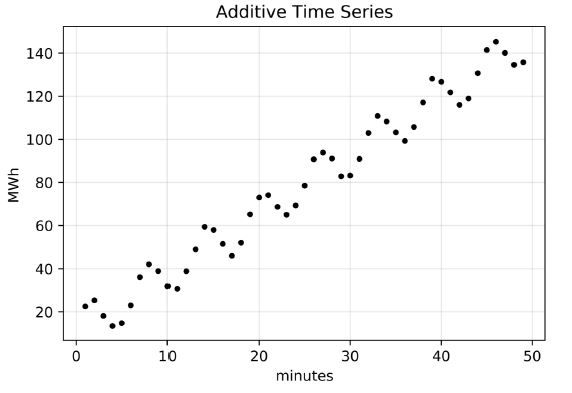

### Multiplicative Model  
The observed time series m ultiplicative models assume that the observed time series is the product of its components.  
- **Observation = Trend * Seasonality * Residual**
- It is possible to transform a multiplicative model to an additive by applying a log transformation:  
- **log(Time * Seasonality * Residual) = log(Time) + log(Seasonality) + log(Residual)**
- Multiplicative models are used when the **magnitudes of the seasonal and
residual values fluctuate with trend**

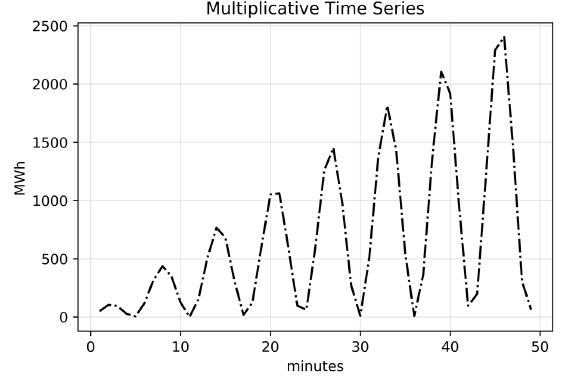

### Additive vs. Multiplicative models

**Additive model**:  
The magnitudes of the seasonal and
residual values fluctuate with trend  

**Multiplicative model**:  
The magnitudes of the seasonal and
residual values are independent of trend

### Pseudoadditive Model  
Pseudoadditive models combine elements of the additive and multiplicative models.
- Useful when time series values are close to or equal to zero and you require a
multiplicative model  
- Division by zero becomes a problem in multiplicative models when this is the
case  
- For example, rewriting the model as follows:  
 $-O_{t}=T_{t}+T_{t}(S_{t}-1)+T_{t}(R_{t}-1)=T_{t}(S_{t}+R_{t}-1)$


### How to decompose a time series  
- single, double or triple exponential smooting   
- locally estrimated scatterplot smoothing (LOESS)  
- Frequency-based methdos  

# Practice

### Construct Trend, Seasonality, and Residual Components

In [ ]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
time = np.arange(1, 51)
trend = time * 2.75

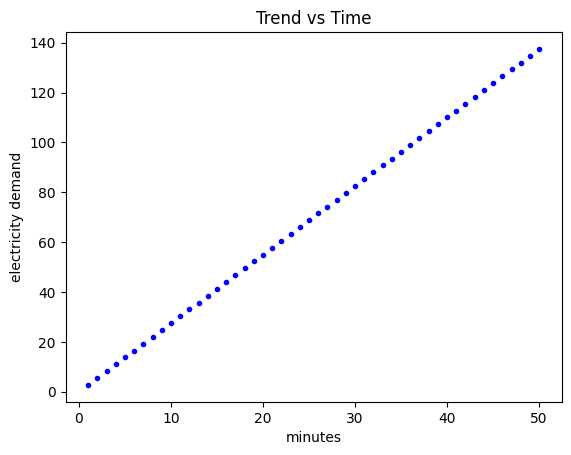

In [ ]:
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [ ]:
seasonal = 10 + np.sin(time) * 10

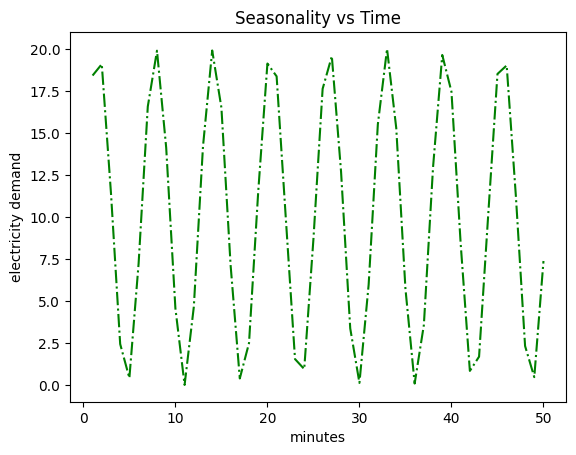

In [ ]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [ ]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

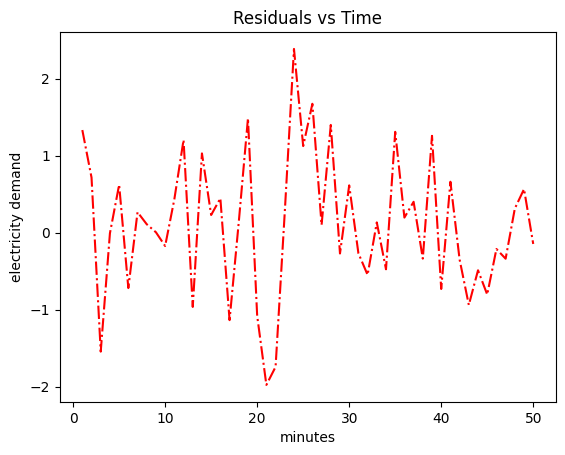

In [ ]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Additive time series  

In [ ]:
additive = trend + seasonal + residual

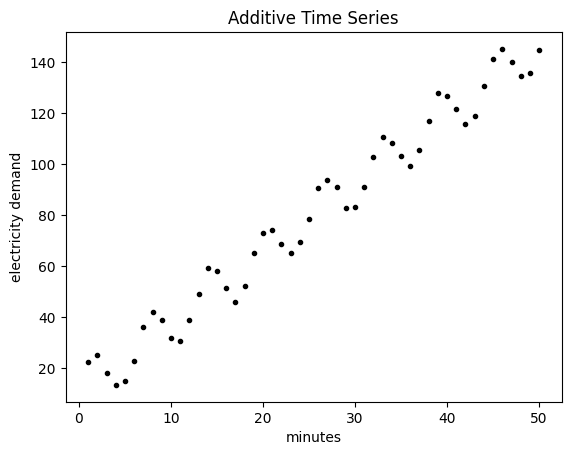

In [ ]:
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Multiplicative time series  

In [ ]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

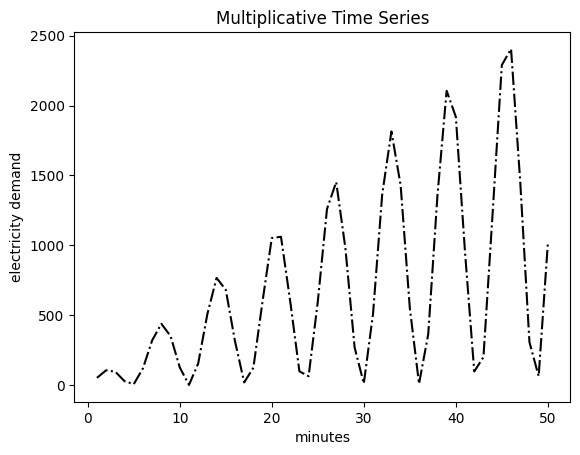

In [ ]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

### Time series decomposition  

#### Additive decomposition  

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

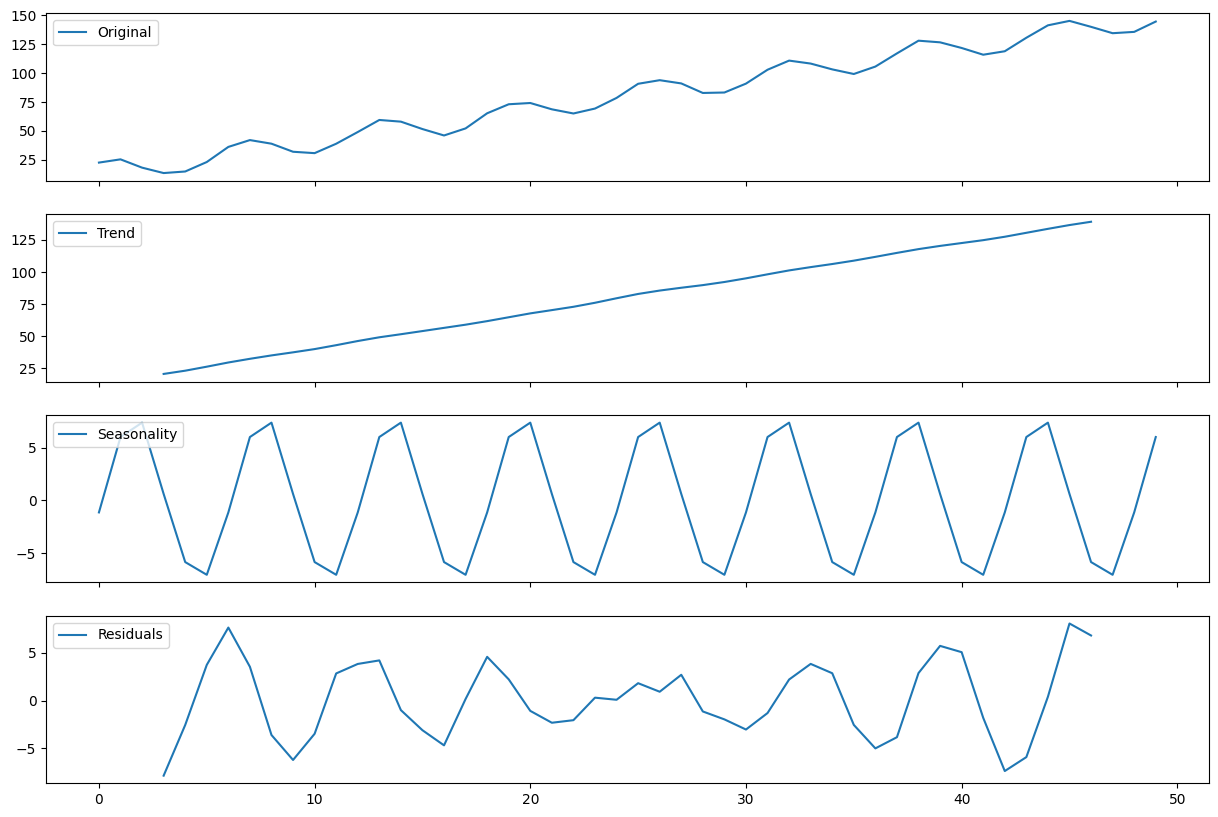

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

#### Multiplicative decomposition  

In [ ]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

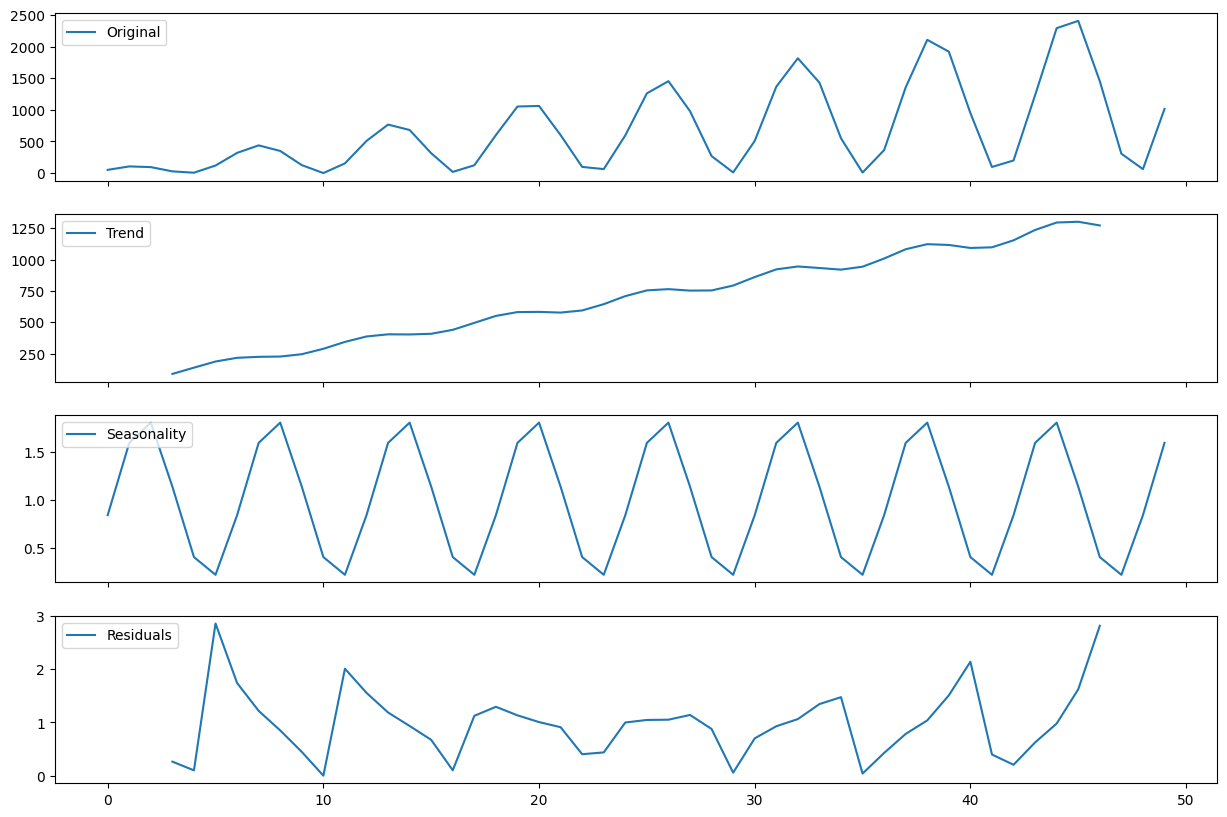

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

# Theory

### Stationarity
A stationary time series is a time series where there are no changes in the underlying system:  
- constant mean (no trend)  
- constant variance (no heteroscedcticity)   
- constant autocorrelation structure    
- no periodic component (no seasonality)  

#### Constant mean

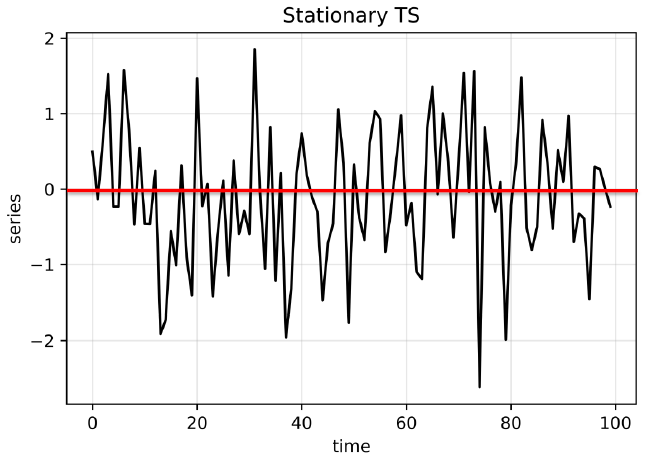

#### Constant variance

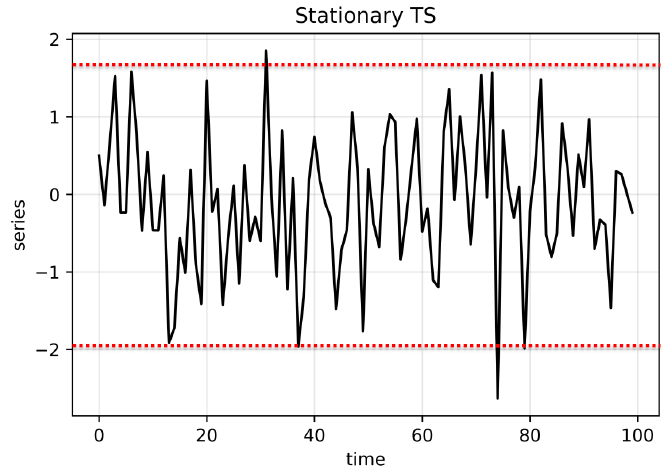

### Autocorrelation  
Autocorrelation is a key concept in time series analysis.  
- Autocorrelation is the correlation between a measurement at two
different times.
- The time interval between values is called the lag.  
- For example, stock prices may be correlated from one day to the next with a lag value of 1.  
- Autocorrelation often results in a pattern, whereas a time series without autocorrelation will exhibit randomness.

### Constant Autocorrelation Structure  
A stationary time series has constant autocorrelation structure throughout the entire series.  
-  If the autocorrelation remains constant throughout the series, a simple transformation can be used to remove the autocorrelation.
- This will be useful for several future models.     

### Why is Stationarity Important?
Stationarity is a fundamental assumption in many
time series forecasting models:  
- Without it many basic time series models would break down.  
- Transformations can be applied to convert a nonstationary time series to a stationary one before modeling.  


### How to Identify Nonstationary Time Series Data  
There are several ways to identify nonstationary
time series data:  
- Run sequence plots  
- Summary statistics  
- Histogram plot  
- Augmented Dickey Fuller test  

### Summary statistics
Calculating the mean and variance over time is a useful way to discern
whether the series is stationary.  

- A simple but effective way to do this is to split your data into chunks over time and compute statistics for each chunk  
- Large deviations in either the mean or the variance among chunks are problematic and mean that your data is nonstationary

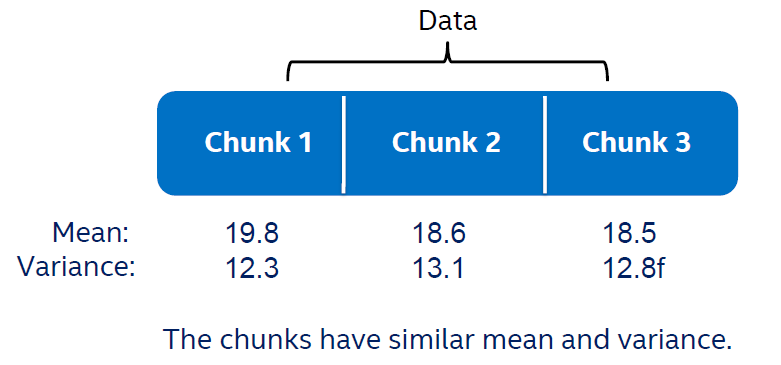

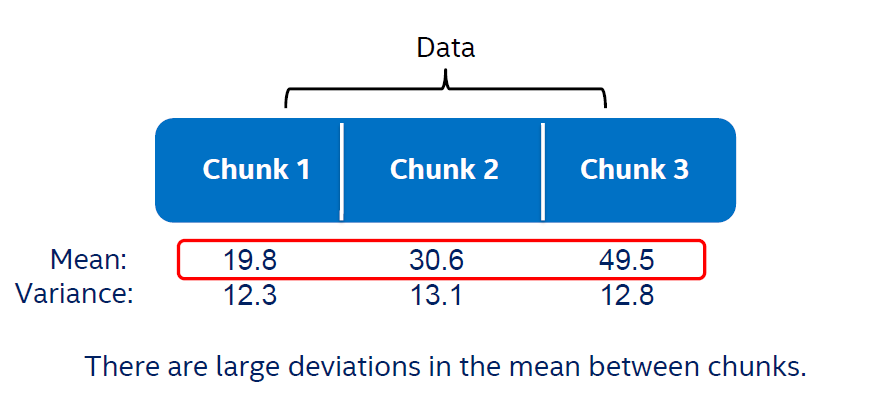

### Histogram plot   
A histogram plot gives important clues into a time series  underlying structure.  
- If you see a distribution that is approximately normal , thats a good indication your time series is stationary.  
- If you see a non n ormal distribution, thats a good indication your time series is nonstationary

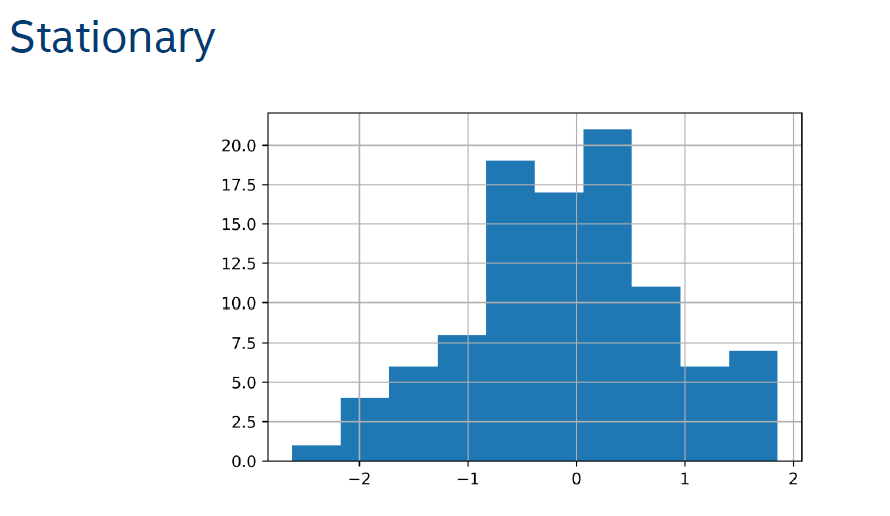

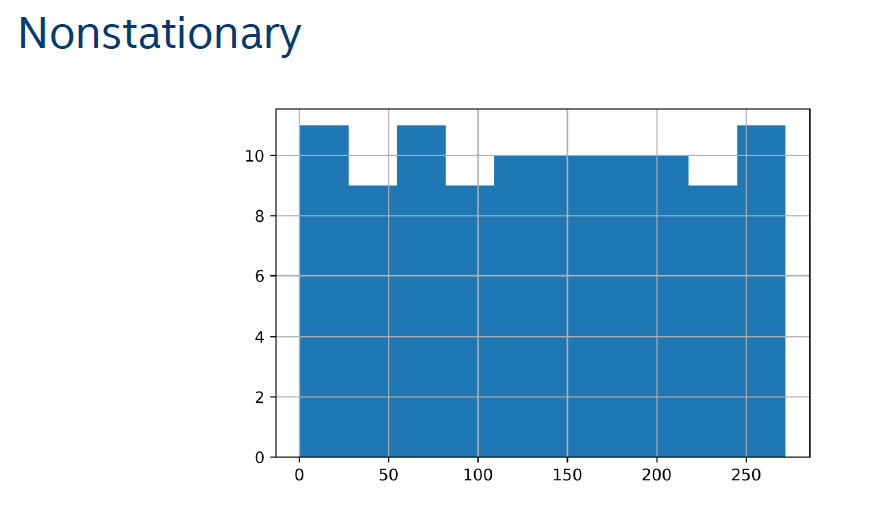

### Augmented Dickey-Fuller Test  
The Augmented Dickey-Fuller test is a hypothesis test that tests specifically for stationarity.  
- We generally say that the series is nonstationary if the `p-value` is less than 0.05.

### How to Transform Nonstationary Time Series Data  
Ways to transform nonstationary time series data:  
- remove trend (constant mean)  
- remove heteroscedasicity with log (constant variance)  
- remove autocorrelation with differencing (exploit constant structure)  
- remove seasonality (no periodic component)

### Trend and Seasonality Present  
A time series with a trend or seasonality component is a nonstationary series.  
To make it stationary, we can do the following:
- Subtract the trend so that the series has constant mean  
- Subtract the seasonality so that the series has no periodic component

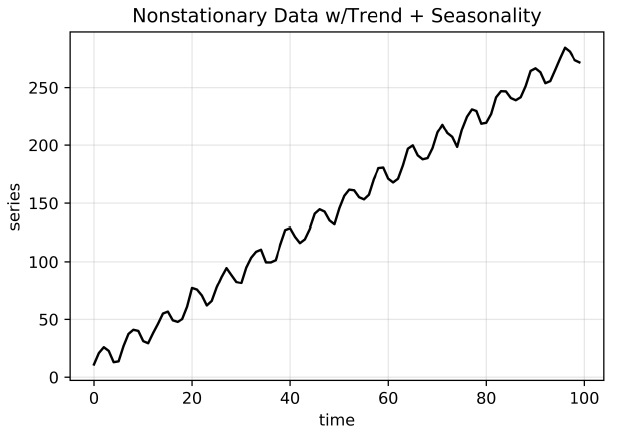

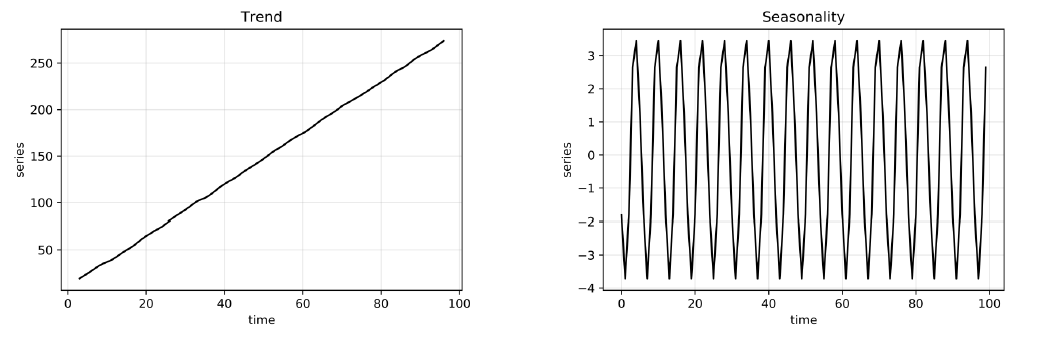

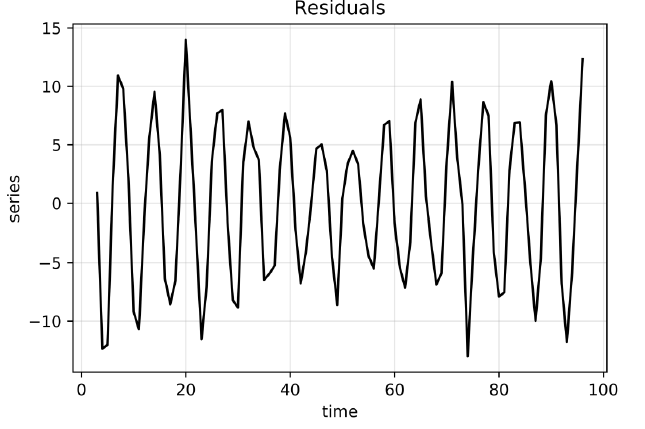

### Heteroscedasticity Present

A time series with differing variances in two distinct regions is a nonstationary series. To make it stationary, we can do the following:  
- Apply the log transformation.  
- Log transformation squashes the larger values so that the variances are closer.

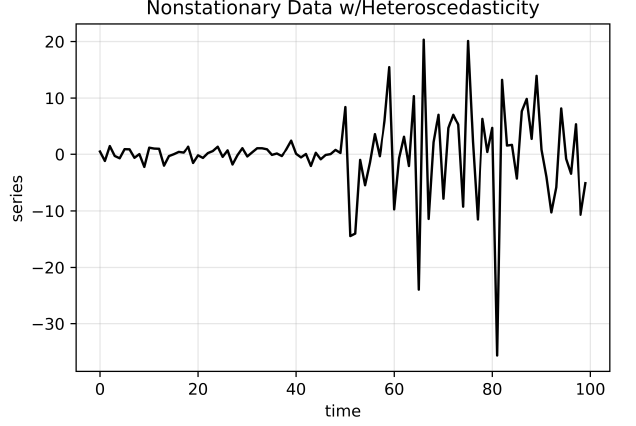

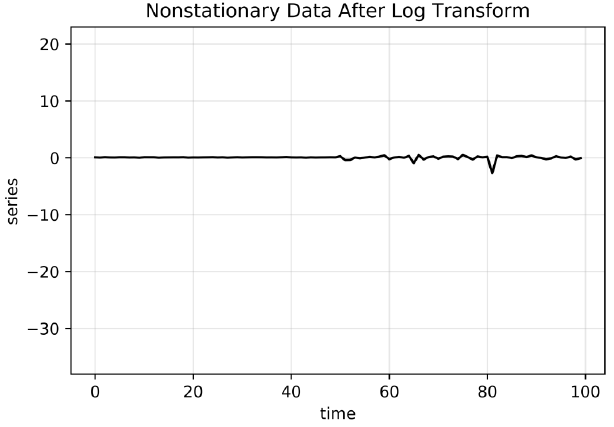

### Autocorrelation Present  
Time series has autocorrelation with a lag of 1. By
definition this is a nonstationary series in its current form. To make it stationary, we can do the following:  
- Difference the data by subtracting by a specific lag  

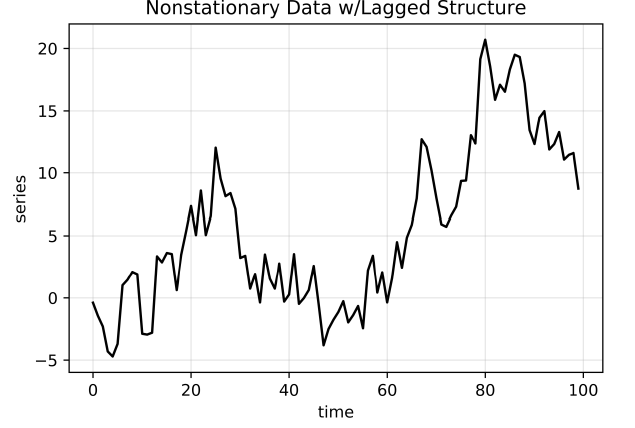

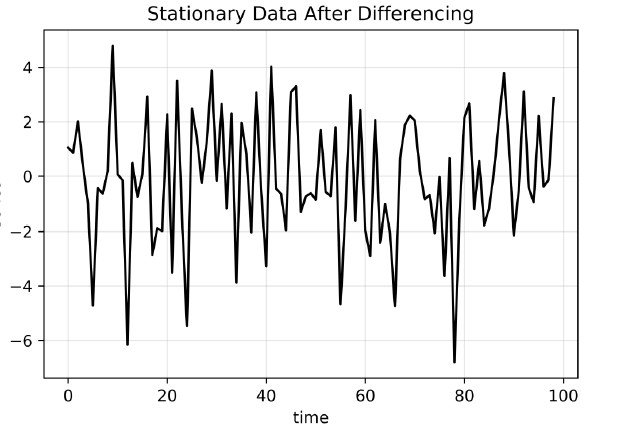

# Practice

In [ ]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [ ]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

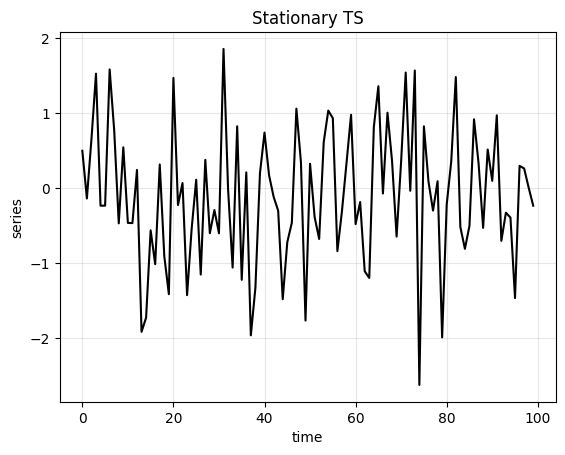

In [ ]:
run_sequence_plot(time, stationary,
                  title="Stationary TS")

In [ ]:
trend = (time * 2.75) + stationary

In [ ]:
seasonality = 10 + np.sin(time) * 10

In [ ]:
trend_seasonality = trend + seasonality + stationary

### Trend
These time series is not stationary because there is changing mean (trend).  

Stationary time series should have:  
- constant mean  
- constant variance  
- constant autocorrelation structure
- no periodic component

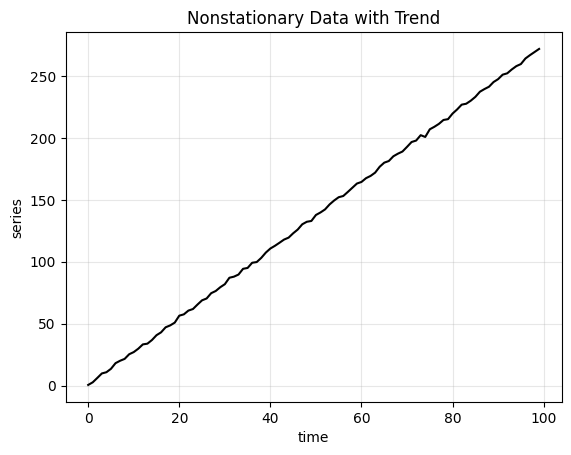

In [ ]:
run_sequence_plot(time, trend,
                  title="Nonstationary Data with Trend")

### Heteroscedasticity  
These time series is not stationary because the variance changes over time.

In [ ]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

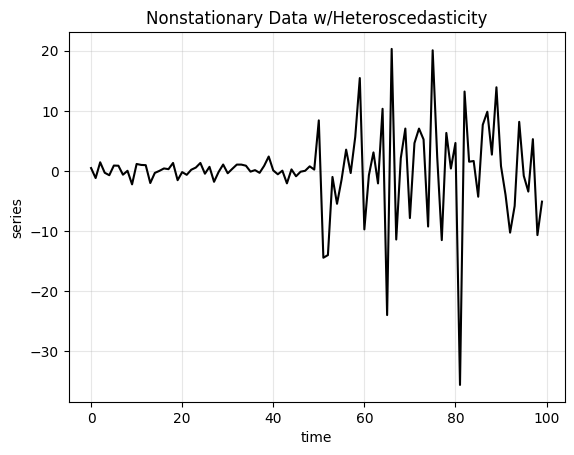

In [ ]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

### Seasonality  
These time series is not stationary because there is periodic component.

In [ ]:
seasonality = 10 + np.sin(time) * 10

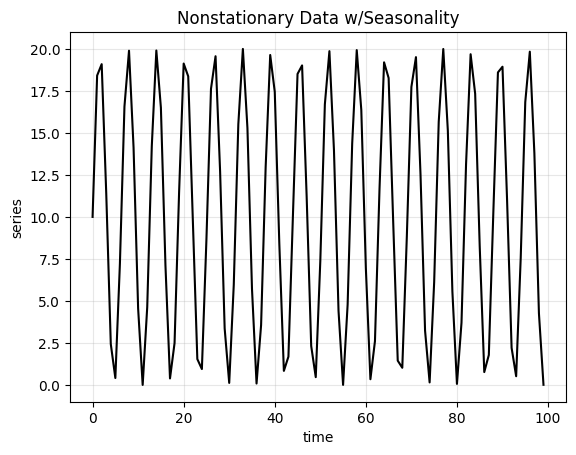

In [ ]:
run_sequence_plot(time, seasonality,
                  title="Nonstationary Data w/Seasonality")

### Summary statistics

In [ ]:
chunks = np.split(trend, indices_or_sections=10)

In [ ]:
mean = np.mean(chunks, axis=1)

In [ ]:
var = np.var(chunks, axis=1)

In [ ]:
pd.DataFrame({'var': var , 'mean':mean })

,var,mean
0,62.547988,12.823061
1,60.866165,39.084342
2,58.745569,67.153156
3,57.232097,94.564893
4,58.950539,122.122178
5,65.111096,150.074441
6,67.709055,177.359943
7,54.810138,204.827264
8,62.676600,232.476447
9,61.642402,259.725809


### Result of summary  
While the variance is relatively constant over time, the mean is clearly changing which means this data is not stationary.

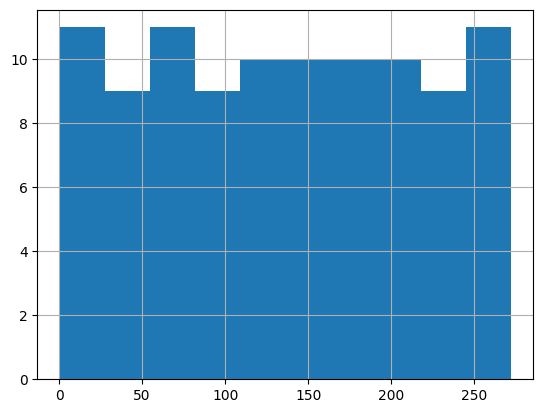

In [ ]:
pd.Series(trend).hist();

Plotting a histogram of the time series gives important clues into its underlying structure. A Normal distribution gives confidence that mean and variance are constant. It's certainly not definitive but gives you a good indication.   

Here we see what appears to be a uniform distribution. As we would expect for time series with trend, this data is not stationary and the histogram plot provides insight into that fact.

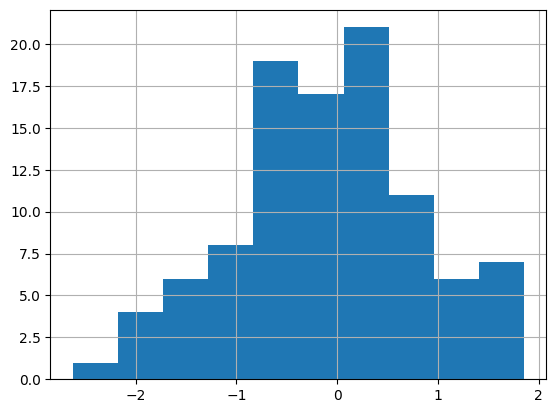

In [ ]:
pd.Series(stationary).hist();

### Augmented Dickey-Fuller Test  
This is a statistical procedure to suss out whether a time series is stationary or not:  
1. **Null hypothesis** the series is nonstationary.  
2. **Alternative hypothesis** the series is stationary.  

Like any statistical test you should set a significance level or threshold that determines whether you should accept or reject the null. The value is 0.05.

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary)

In [ ]:
print(adf)

-10.084425913669714


First, adf is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -10. That may not mean anything to you just yet but the pvalue should.

In [ ]:
print(pvalue)

1.1655044784188669e-17


Next, pvalue is interpreted like any p-value. Once we set a threshold, we can compare this p-value to that threshold. Either we reject or fail to reject the null. Here pvalue is very close to zero (~$10^{-17}$) so we reject the null that this data is nonstationary

In [ ]:
print(nobs)

99


The variable nobs is simply the number of observations in the time series, in this case 99.


In [ ]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  0.33188731231643376
p-value: 0.9787610787258313


### Common Nonstationary-to-Stationary Transformations

### Removed trend and seasonality with statsmodel

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

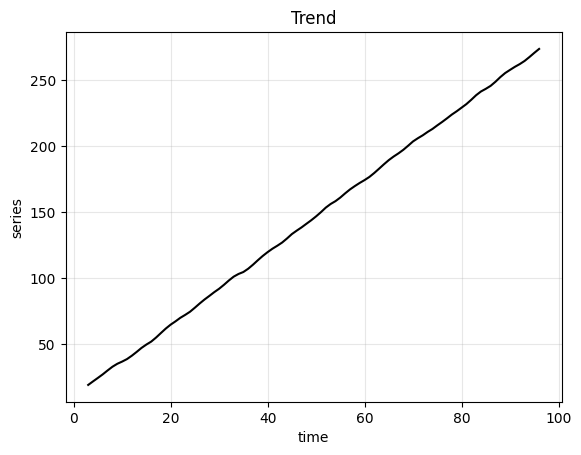

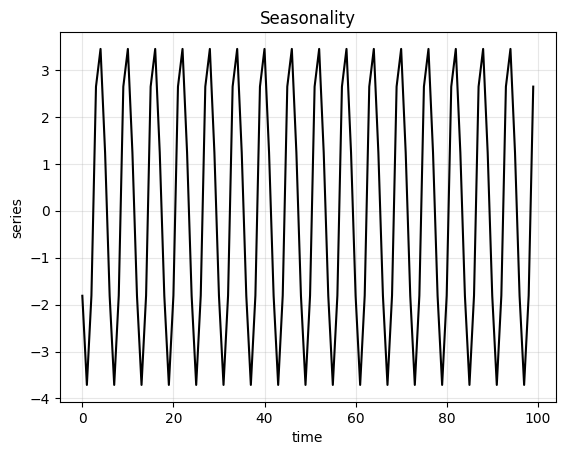

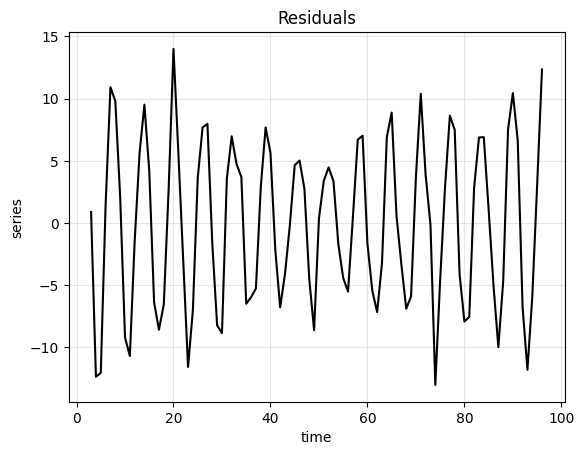

In [ ]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

In [ ]:
print(est_residual)

[         nan          nan          nan   0.8840983  -12.35758556
 -12.04433461   1.48296718  10.92168902   9.79838903   2.1098592
  -9.18549316 -10.68530084  -1.39341901   5.62708429   9.51728139
   4.19733863  -6.37688101  -8.57079082  -6.54120712   2.73466783
  13.99559009   5.66172011  -2.96051089 -11.56383319  -6.98680664
   3.63407228   7.6896628    7.96829354  -1.62794659  -8.22074175
  -8.84730447   3.55066635   6.97315154   4.74605812   3.69790485
  -6.48278186  -5.95820585  -5.25809215   2.87435058   7.68322103
   5.64810713  -2.17356117  -6.77398565  -4.08149483  -0.16197687
   4.65431128   5.02346523   2.76727458  -4.5018214   -8.61021749
   0.383526     3.39920212   4.47636135   3.35785156  -1.70991311
  -4.41005501  -5.51047744   0.45522075   6.69811425   7.02150652
  -1.65724247  -5.43116384  -7.15141958  -3.23759496   6.91315694
   8.8780479    0.56710431  -3.33147621  -6.88311175  -5.88888625
   3.72543884  10.38963663   3.8706296   -0.1327287  -13.00749744
  -4.573024

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -5.672045394689442
p-value:  8.876265981115178e-07


# Theory

Smoothing is a process that allows you to extract useful patterns from data. You can smooth data with use of:  
- simple average smoothing
- equally weigthed moving average
- exponentially weighted moving average


Smoothing is one important tool that allows you to make future-looking forecasts.  



### Forecasting with Simple Average  
An obvious solution is to calculate the mean of the series and predict that value into the future.   

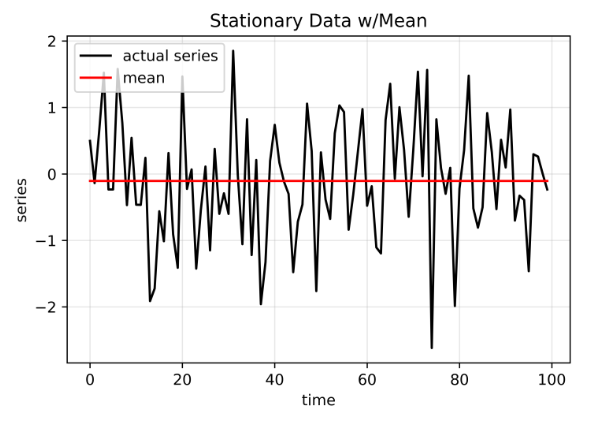

Forecasting with simple average is not going well with trend.

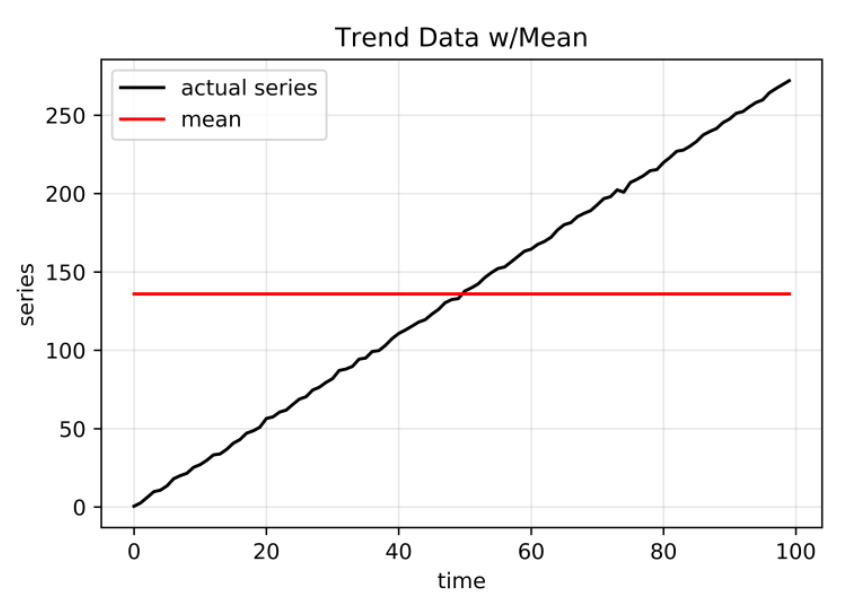

### Forecasting with Moving Average

Moving average has greater sensitivity towards local chnages in the data.   
Moving average comes in to flavors:  
- equally weighted
- exponentially weighted

### Equally weighted moving average

Equally weighted moving average can extract key pattern for time series with trend, seasonality and both trend and seasonality.



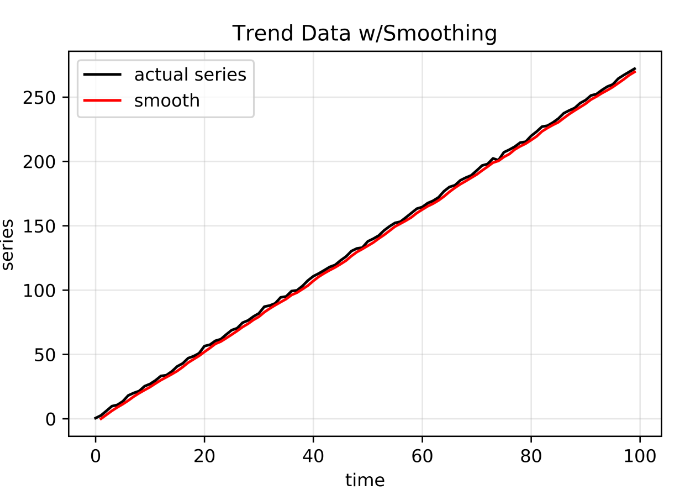  

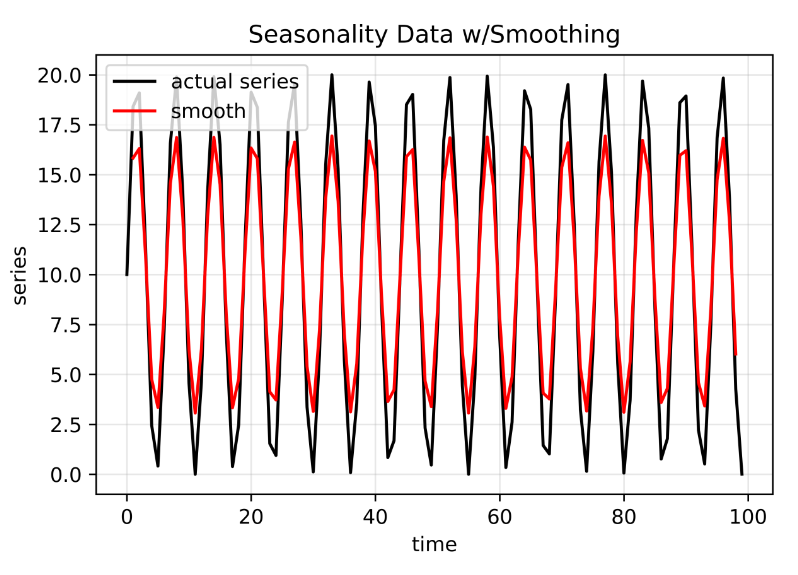

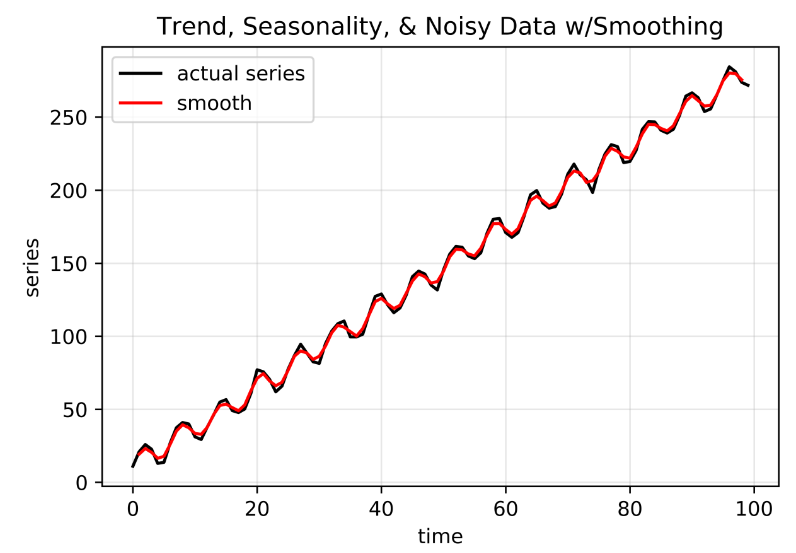

### Exponentially Weighted Moving Average

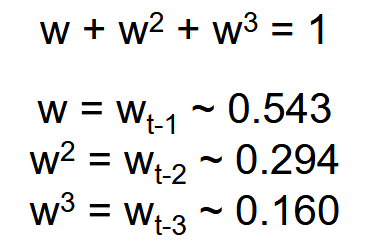

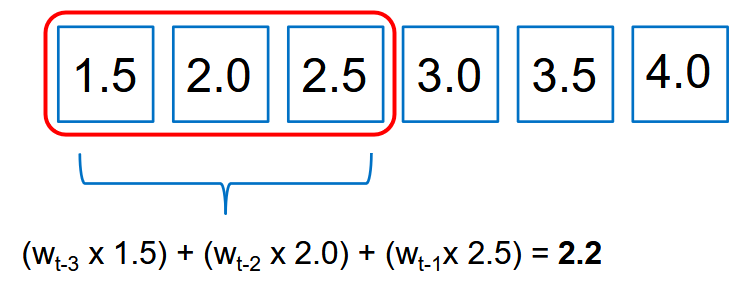

### Comparison  
Exponentially moving average is not good enough.

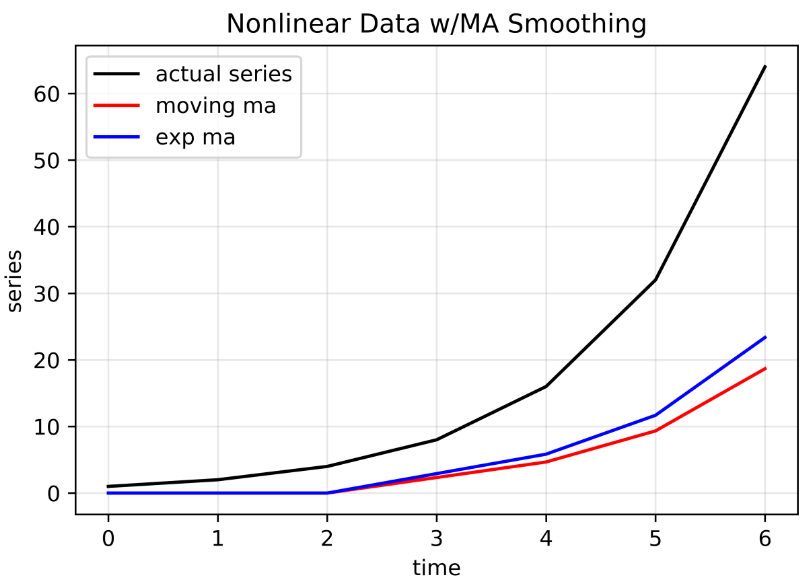

## Advanced smoothing

### Single Exponential Formulation

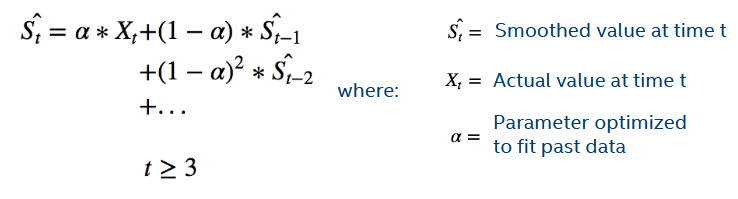

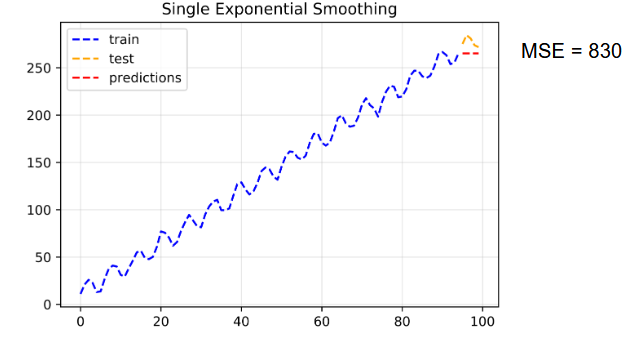

Single exponentail smoothing produces the same value pushed out over the forecast horizon. It is not capturing neither trend nor seasonality.

### Double Exponential Formulation

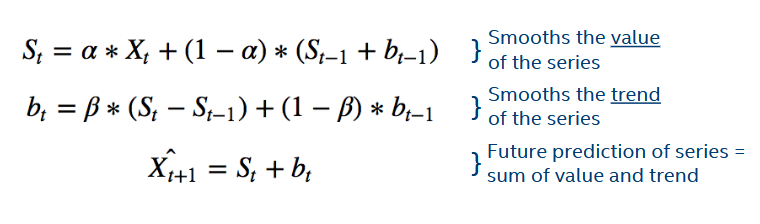

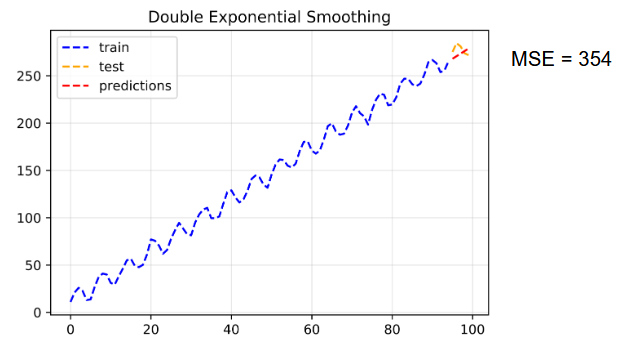

### Triple Exponential Formulation

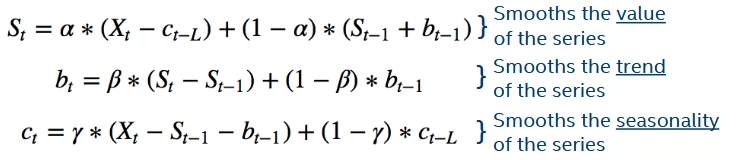

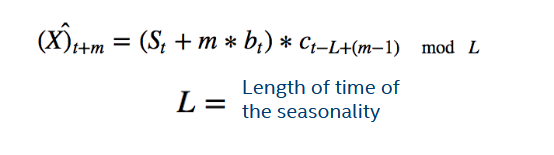

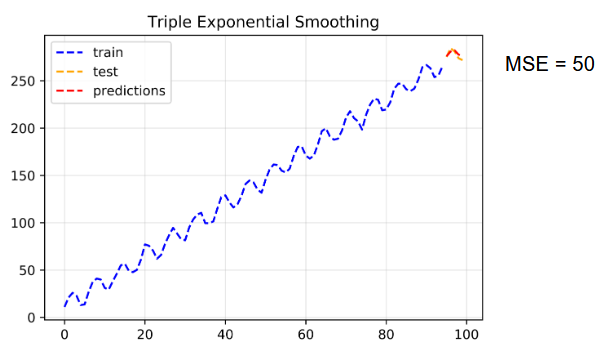

# Practice

In [ ]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [ ]:
trend = (time * 2.75) + stationary
seasonality = 10 + np.sin(time) * 10

trend_seasonality = trend + seasonality + stationary

In [ ]:
train = trend_seasonality[:-5]
test = trend_seasonality[-5:]

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))

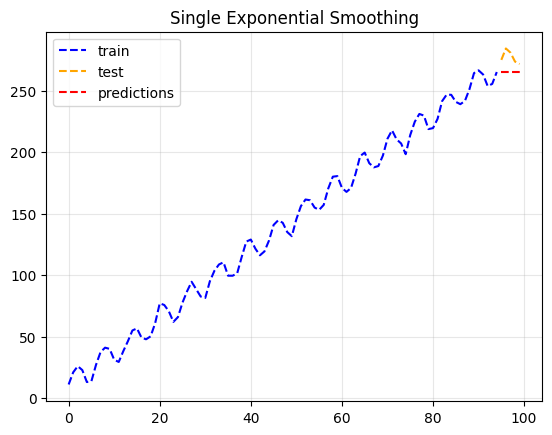

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

In [ ]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))

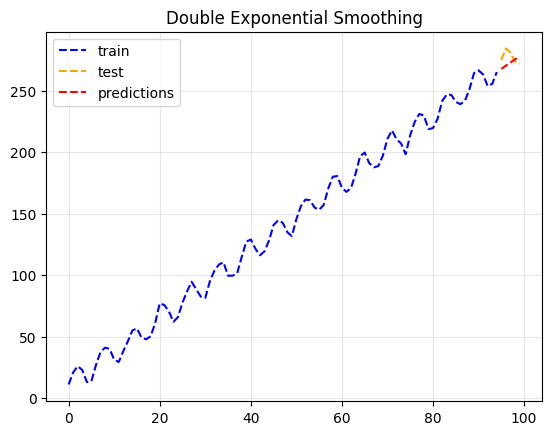

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=13).fit(optimized=True)
triple_preds = triple.forecast(len(test))

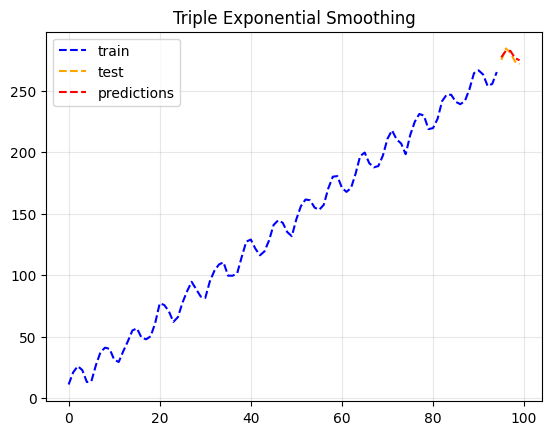

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

# Theory

### Autocorrelation Function (ACF)

 Autocorrelation detects repeating patterns in a signal, such as periodicity. For example, if a signal has a regular cycle, its autocorrelation will highlight that periodicity.

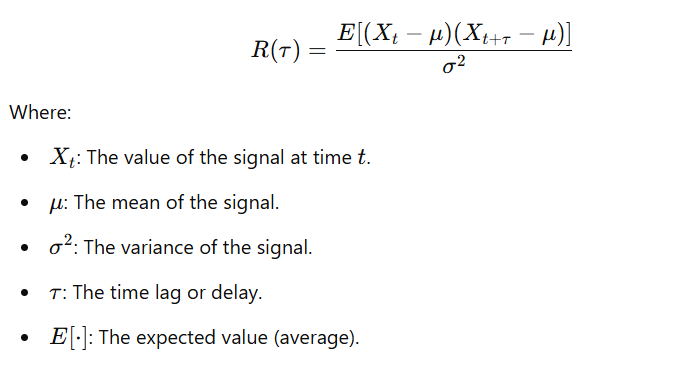

**What it calculates:**
- It computes the statistical correlation between the signal at time $t$ and a delayed version of the signal at time $t+\tau$
- The numerator $(X_t - \mu)(X_{t+\tau}-\mu)$ measures how the deviations from the mean at $t$ and $t+\tau$ are releated.
- The denominator $\sigma^{2}$ normalizes the result, ensuring the autocorrelation lies between -1 and 1.

Expected value:

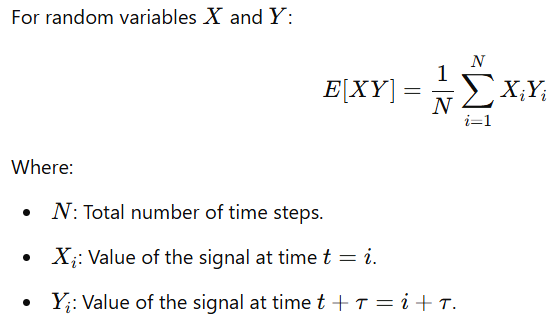

### Interpretation of ACF  
- $R(\tau)$ close to 1: strong positive correlation at the time lag $\tau$.
- $R(\tau)$ close to -1: strong negative correlation at time lag $\tau$  
- $R(\tau)$ close to 0: no significant correlation at time lag $\tau$.   

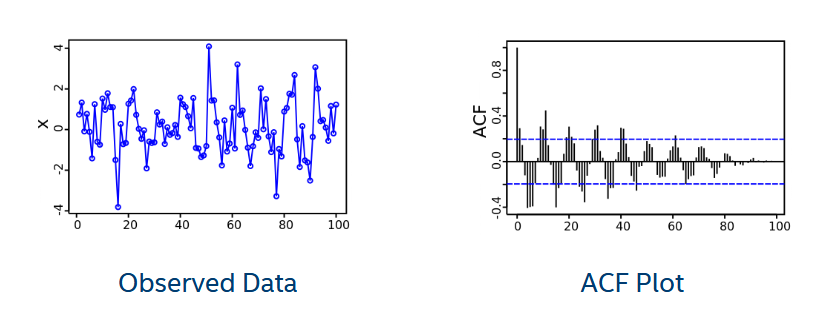

### Correlation
$$
Cor(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)\cdot Var(Y)}}
$$

where:  
- covariance $Cov(X,Y)$:
$$
Cov(X,Y) = E[(X-\mu_{X})(Y-\mu_{Y})]
$$
where
$\mu_{X}$ = E[X] is the mean of X  
$\mu_{Y}$ = E[Y] is the mean of Y

- variance $Var(X)$:
$$
Var(X) = E[(X-\mu_{X})^{2}]
$$

Interpretation of correlation coefficient ($Cor(X,Y)$):
- $Cor(X,Y) = 1$ perfect positvie linear relationship
- $Cor(X,Y) = -1$ perfect negative linea relationship
- $Cor(X,Y) = 0$ no linear relationship  

It measures the strength and direction of the lindear relationship between $X$ and $Y$.



### Partial Autocorrelation Function (PACF)  
Partial Autocorrelation Function (PACF), which is used in time series analysis to measure the relationship between observations at different time lags.


The Partial autocorrelation at lag $k$ is the correlation between $X_{t}$ (the value at time $t$) and $X_{t-k}$ (the at time $t-k$), after removing the effects of the intermediate lags.

**PACF** is calculated with projection, if you want to project a vector $x$ onto a subspace $V$ spanned by vectors ${v_{1}, v_{2}, ..., v_{k}}$:
- you find the part of $x$ that lies in V which is written as:  
$$
P_{V}(x)=\sum_{i}^{k} c_{i}v_{i}
$$
where $c_{i}$ are coefficient that depend on $x$ and the basis vectors.

**PACF** is calculated as:  
$$
\alpha(1) = Cor(x_{t+1}, x)
$$

$$
\alpha(k)=Cor(x_{t+k}+P_{t,k}(x_{t+k}), x_{t}-P_{t,k}(x_{t}))
$$
where $P_{t,k}(x)$ denotes the projection of x onto the space spanning $x_{t+1}, ... x_{t+k-1}$

### Key distinction between ACF and PACF  
#### Autocorrelation Function (ACF)
- measures the correlation between a time series and its lagged versions directly.
- it includes the influence of intermediate lags.
- For example, the autocorrelation at lag $k$ measures the correlation between $X_{t}$ and $X_{t-k}$ but it does not remove the contributions of lags 1,2 ... k-1



#### Partial Autocorrelation Function (PACF)  
- the Partial Autocorrelation Function (PACF) measures the direct correlation between a time series and its lagged version at lag $k$, excluding the influence of intermediate lags.




### Purpose
The PACF tells us the direct relationship between a time series and its lag at $k$, without the influence of intermediate lags.  
It's commonly used in:

- **ARIMA modeling**: To identify the appropriate order
p of an autoregressive (AR) model.
- **Time series diagnostics**: To determine which lags are most significant.

### Autoregressive Models (AR)
- a common approach to model univariate time series is use autoregressive models (AR).
- an AR model is a linear regression of the current value of the series against one or more prior values of the series.
- uses maximum likelihood estimators to determine coefficients instead of least squares.

$$
X_{t} = \sum_{i=1}^{p} \alpha_{i} X_{t-i} + \varepsilon_{t}
$$

where:  
- $\alpha_{i}$ is the parameter of the model
- $\varepsilon_{t}$ is white noise


Autoregressive models (AR) are useful for shor term forecasts.

### Forecasting with AR

**Step 1.**  
Model the trend and seasonality of a time series and substract it from the data:  
$$
X_{t} = Observed_{t}-Trend_{t}-Seasonality_{t}
$$

**Step 2.**  
Calculate AR on $X_{t+1}$

**Step 3.**  
Forecast = $X_{t+1} + Trend_{t} + Seasonality_{t} $

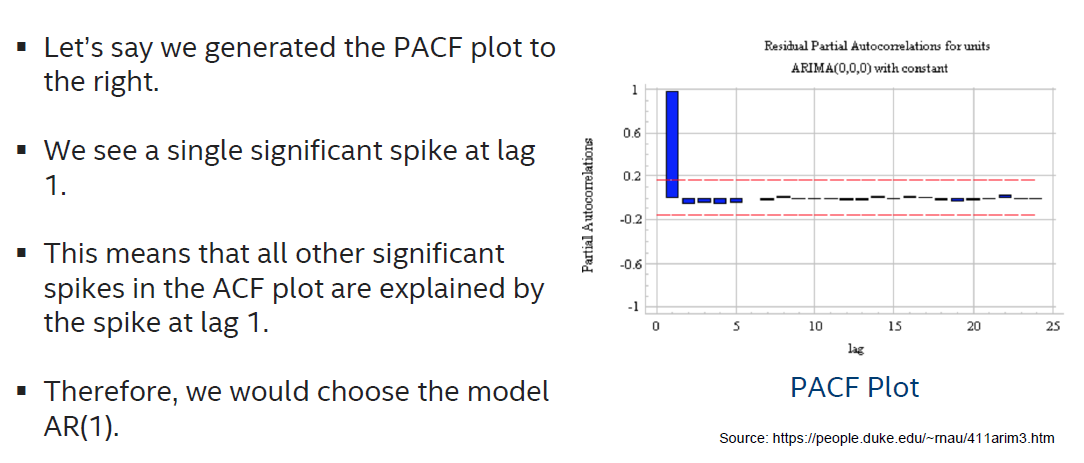

### Moving Average Models (MA)   
- another common approach to modeling univariate time series is the moving average (MA) model.
- MA models are conceptually a linear regression of the current value of the series against the white noise of one or more of the previous values of the series.
- The noise at each point is assumed to come from a normal distribution with mean 0 and constant variance.
- MA models are more complicated and less interpretable than AR models.

$$
X_{t} = \varepsilon_{t} + \sum_{i=1}^{q} \theta_{i}\varepsilon_{t-1}
$$

where $\theta_{i}$ is parmeters of the model and $\varepsilon_{t}$ is white noise.

## AR or MA model?

- If the **PACF drops sharply** at a given lag or the first lag autocorrelation is **positive**, then use an **AR model** with order p equal to the lag just before the sharp decline.  
- If the **ACF drops sharply** at a given lag or the first lag autocorrelation is **negative**, then use an **MA model** with order q equal to the lag just before
the sharp decline.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html  

# Practice

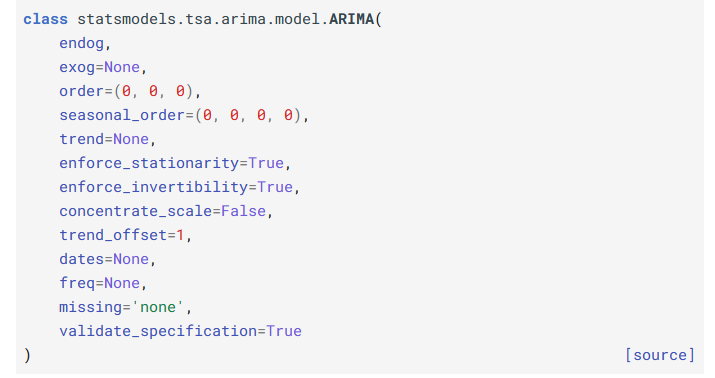   


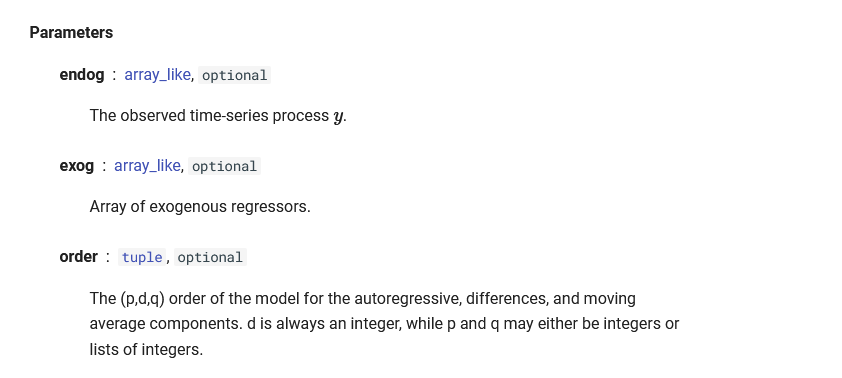   


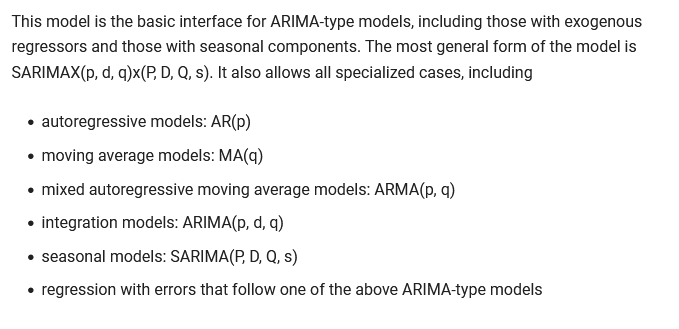

### MA Models with Statsmodels

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# reproducibility
np.random.seed(42)

# time component
time = np.arange(100)

# data
noise = np.random.normal(loc=0, scale=6.5, size=len(time))
trend = time * 2.75
seasonality = 10 + np.sin(time * 0.25) * 20
data = trend + seasonality + noise

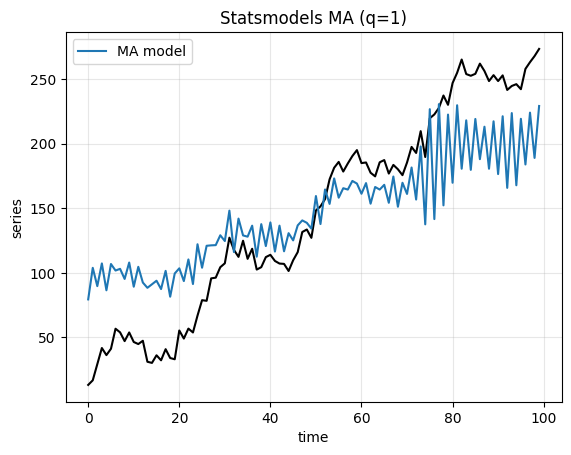

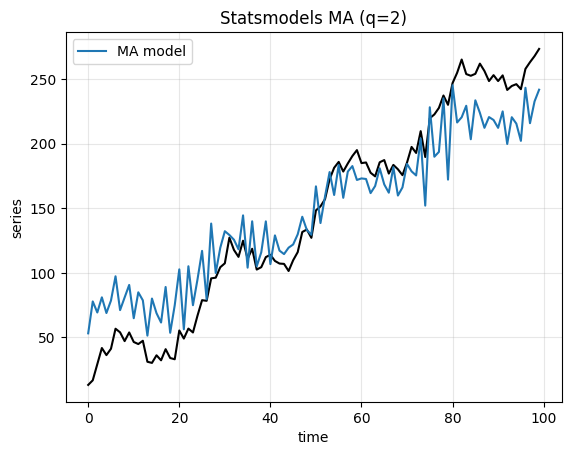

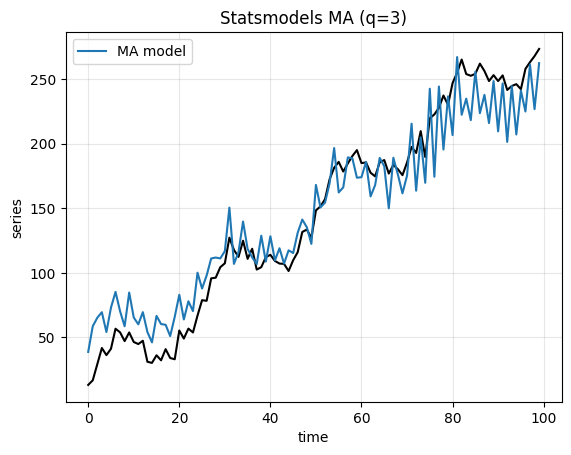

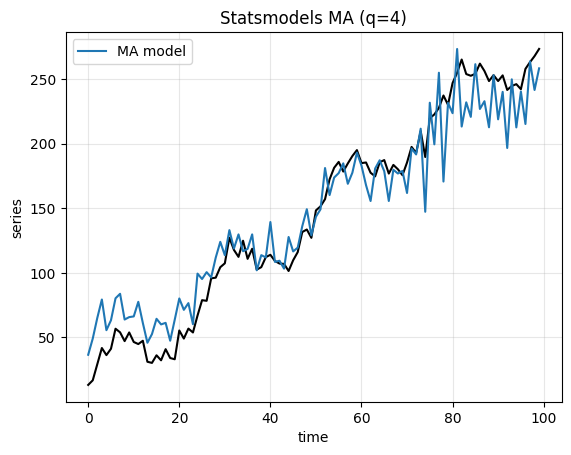

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


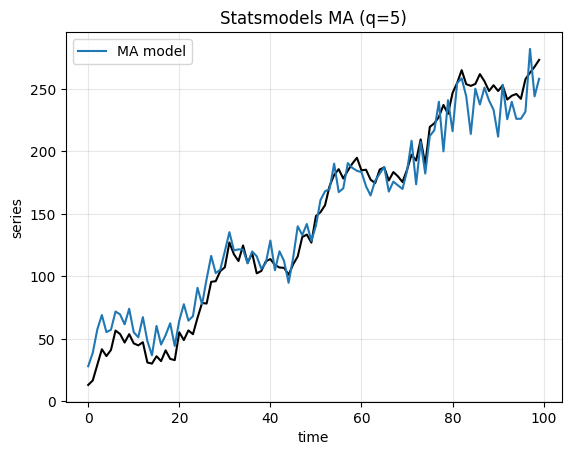

In [ ]:
# plot different orders (q's)
# order = (p, d, q)
for i in range(1,6):
    model = ARIMA(data, order=(0,0,i)).fit()
    run_sequence_plot(time, data, title="Statsmodels MA (q={})".format(i))
    plt.plot(time, model.predict(start=1, end=100), label="MA model")
    plt.legend()
    plt.show();

### Chosing q of MA model
The blue region represents a confidence interval. Alpha in this case was set to 0.05 (95% confidence interval). The stems represent lagged correlation values. In other words, a lag of 1 correlates almost perfectly with the current endogenous value. A lag of 2 correlates nearly but not quite as well. And so on. Remember that we're regressing on past forecast errors; that's the correlation we're inspecting here.

Correlations outside of the confidence interval are statistically significant whereas the others are not. You can use this plot to choose the value of q to include in your MA model. **One key thing to note is that MA models require stationarity**. You should see **correlations drop quickly**. If they don't, that's a sign that your **data is not stationary**, as we see here.

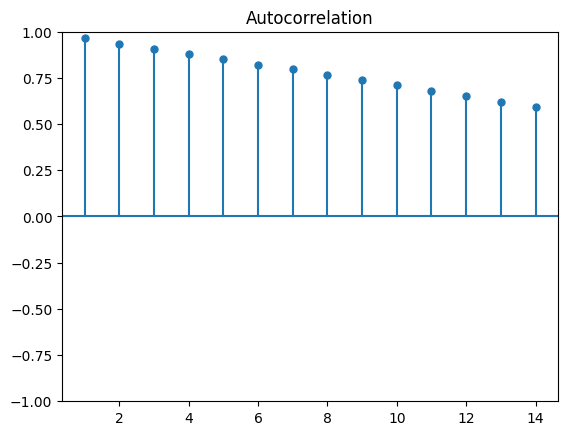

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(data, lags=range(1,15),alpha=None)

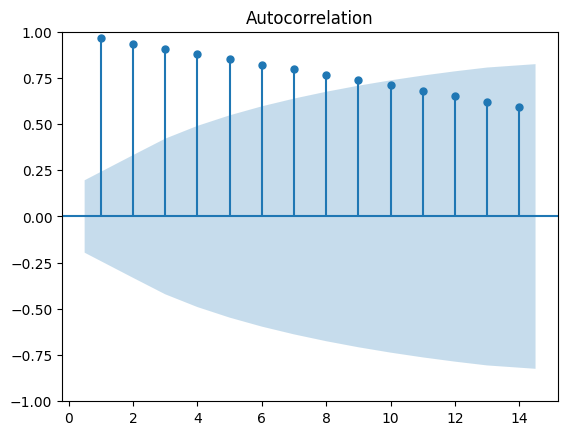

In [ ]:
fig = plot_acf(data, lags=range(1,15),alpha=0.05)

### Stationarity  
That concludes our discussion of MA models

In [ ]:
difference = data[:-1] - data[1:]
difference2 = difference[:-1] - difference[1:]

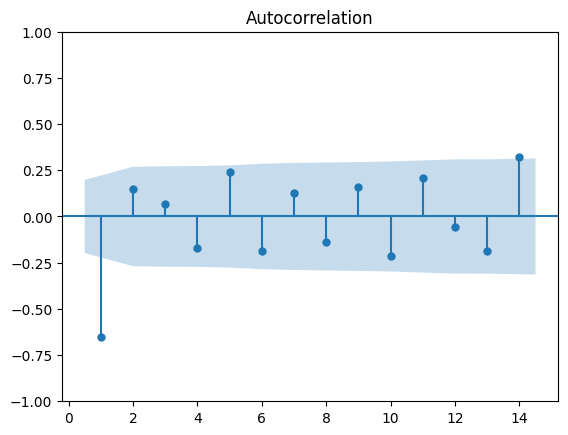

In [ ]:
fig = plot_acf(difference2, lags=range(1,15), alpha=0.05)

### Autoregressive (AR) Models   
AR models are similar to MA models with one key distinction. MA models regress on past forecast errors in order to forecast future values. On the other hand, AR models regress on actual past values, not past errors.     



This is the first order or **AR(1)** formula you should know: $y_t = \beta_0 + \beta_1y_{t-1}+\epsilon_t$

The $\beta$'s are just like those in linear regression and $\epsilon$ is irreducible error.

A second order or **AR(2)** would look like this: $y_t = \beta_0 + \beta_1y_{t-1}+\beta_2y_{t-2}+\epsilon_t$


In [ ]:
# seed to start series
seed = 14

# reproducibility
np.random.seed(123)

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]
    if t > 0:
        lagged[t] = lagged[t] + (0.7 * lagged[t-1])

<ipython-input-62-d18655b69d5b>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)


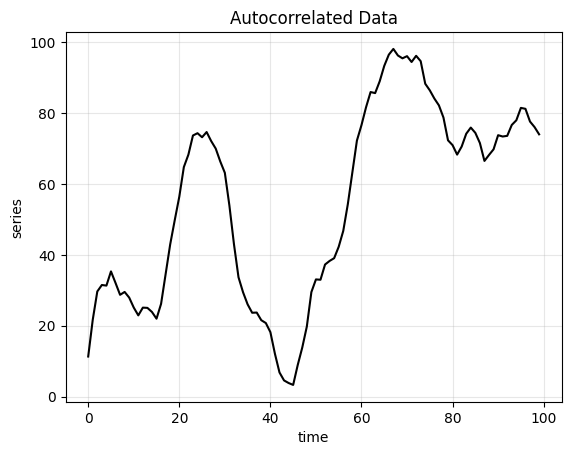

In [ ]:
run_sequence_plot(time, lagged, title="Autocorrelated Data");

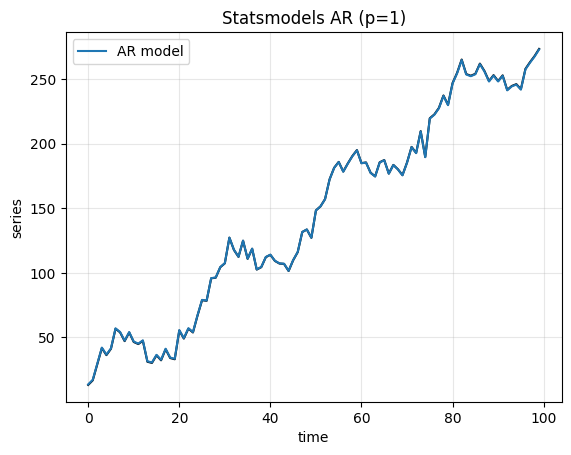

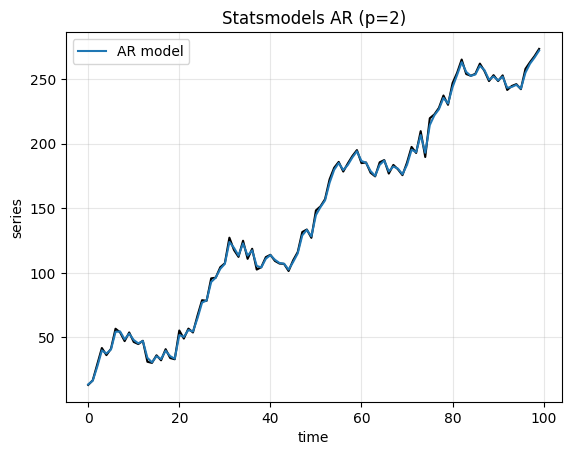

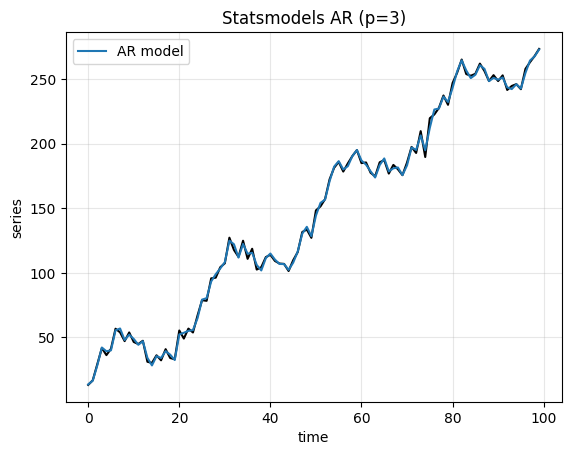

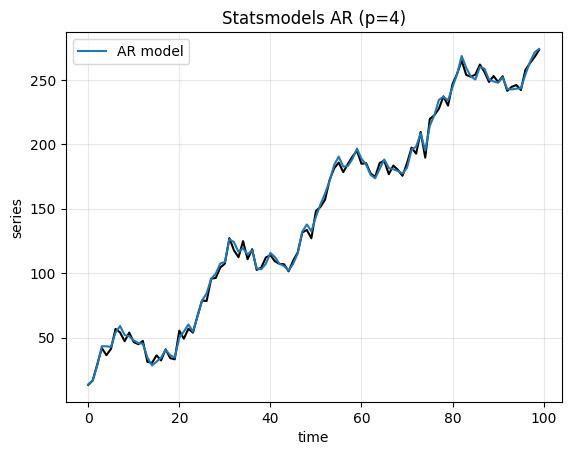

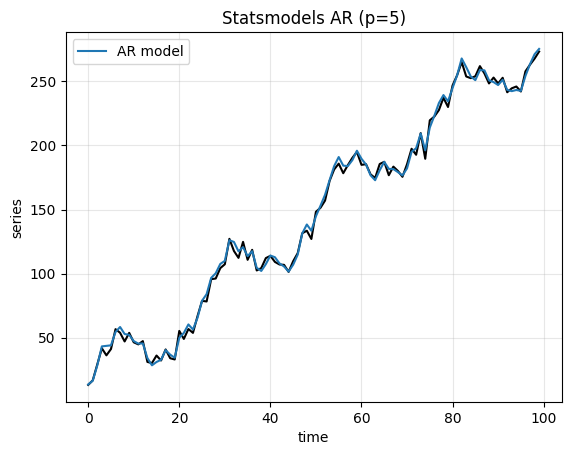

In [ ]:
for i in range(1,6):
    model = ARIMA(data,  order=(i,0,0)).fit()
    run_sequence_plot(time, data, title="Statsmodels AR (p={})".format(i))
    plt.plot(time, model.predict(start=1, end=100), label="AR model")
    plt.legend()
    plt.show();

Choosing the order p of the AR model is important. Thankfully, there's a useful plot called the Partial Autocorrelation Function plot that can help us with that task.

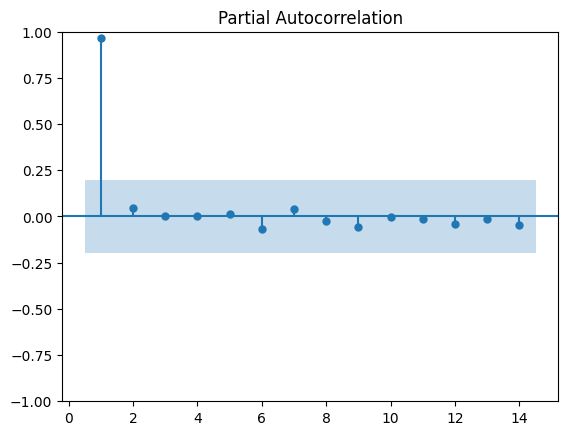

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(data, lags=range(1,15), alpha=0.05)

The blue region once again is the 95% confidence interval. The ACF is a way to measure the linear relationship between a current observation and observations at previous time periods. It turns out we are really only interested in the relationship between the current observation and a past value determined by a lag value.

This example shows that an AR(1) model is most appropriate for this data. We know this because the partial autocorrelation is significant for this lag but for no other lags.

# Theory

### ARMA Model  
The ARMA model (also known as the Box-Jenkins approach) combines
two models:  
- An autoregressive model  
- An autoregressive model  


ARMA Model:  
- The time series is assumed to be stationary   
- A good rule of thumb is to have at least 100 observations when fitting an ARMA model  


ARMA Model Identification:
- The time series is stationary.  
- Whether the time series contains a seasonal component.  


After the time series is stationary, you must identify the order of the AR and MA models. You will identify p and q with:  
- Autocorrelation plot  
- Partial autocorrelation plot  

### ARIMA Model  
ARIMA stands for autoregressive integrated moving average. ARIMA models have three components:  
- AR model
- Integrated component  
- MA model  

The ARIMA model is denoted ARIMA(p, d, q):  
- p is the order of the AR model,
- d is the number of times to difference the data,
- q is the order of the MA model.   


It turns out that differencing nonstationary time series data one or more times can make it stationary. Thats the integrated component of ARIMA:  
- d is the number of times to perform a lag-1 difference on the data
- d=0: no differencing  
- d=1: difference once  
- d=2: difference twice  

### SARIMA Model  
SARIMA is short for seasonal ARIMA. This model is used to remove seasonal components.
- The SARIMA model is denoted SARIMA(p, d, q)(P, D, Q).  
- P, D, and Q represent the same as p, d, and q but they are applied across a season (for example, yearly)

### Choosing ARIMA/SARIMA Parameters   
How do you choose p,d,q and P, D, Q?   
- Visually inspect a run sequence plot for trend and seasonality  
- Generate an ACF Plot  
- Generate a PACF Plot  
- Rule of thumb: p + q <= 3


### Kalman Filter  
Kalman Filter is a way to make a best guess about a signal in the presence of noise. Fundamental idea behind Kalman Filter is that noise signal in made less noisy by filtering out some of the noise.  

Kalman Filter is used in:  
- tracking objects  
- image processing   
- economic and financial modeling  


With use of:  
- Mathematical model of the system  
- Measurements related to the system  

You can estimate your state with:
- model with information from the previous time point
- the latest measurement  

Example:
Object moving at a constant velocity:
- model position is $velocity \cdot time + noise$
- measurements of position and velocity (velocity is also noisy)


- If the model has relatively large errors, more weight is given to the latest measurement in making the current estimate.

- If the measurement has larger errors, more weight is given to the model in making the current estimate.

- Therefore, you need to estimate not only your state but also the errors (the covariance) for both the model and the measurements. These must be updated at each time step, too.



### Kalman Filter - Fundamental Assumptions  
- The system can be described or approximated by a linear model.
- All noise (from both the system and the measurements) is white.
- All noise is Gaussian.

### One-dimensional position estimation  
- At time $t_1$, your measurement is $z_1$ with standard deviation $σ_{z1}$
- At time $t_2 (\approx t_1)$, your measurement is $z_2$ with standard deviation $σ_{z2}$  


What is the best estimate of your position at the two times?

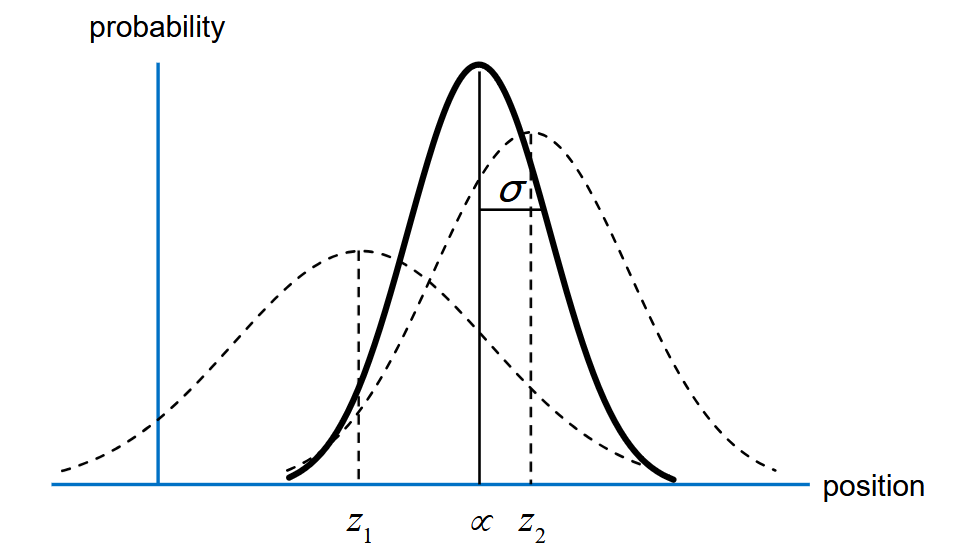

### Best estimate at time $t_1$  
- Estimate of position x time t_1: $x(t_1)=z_1$
- Variance of the error in the estimate $\sigma_{x}^{2}(t_{1})=\sigma_{z_{1}}^{2}$


### Best estimate at time $t_2$  
- Estimate of position x time t_2: $x(t_2)=\alpha$
- Variance of the error in the estimate $\sigma_{x}^{2}(t_{2})=\sigma^{2}$


### Best estimate at time $t_{2}$  

These equations calculate a weighted average of two measurements $z_{1}$ and $z_{2}$ incorporating their variances $\sigma^{2}_{z_{1}}$ and $\sigma^{2}_{z_{2}}$, to estimate the true value $\alpha$. This represents the weighted sum of measurements $z_{1}$ and $z_{2}$ where weights are inversely proportional to their variances.


$$
\alpha = \frac{\sigma^{2}_{z_{2}}}{\sigma^{2}_{z_{1}}+\sigma^{2}_{z_{2}}}z_{1} + \frac{\sigma^{2}_{z_{1}}}{\sigma^{2}_{z_{1}}+\sigma^{2}_{z_{2}}}z_{2}
$$


$$
\frac{1}{\sigma^{2}} = \frac{1}{\sigma^{2}_{z_{1}}} + \frac{1}{\sigma^{2}_{z_{2}}}
$$


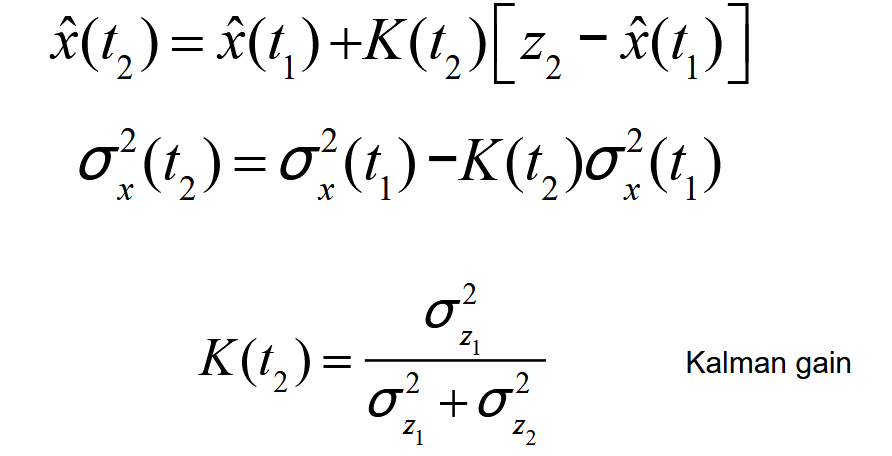